In [207]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
import seaborn as sns
from sklearn.cluster import KMeans
from sklearn.multioutput import MultiOutputRegressor
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import MinMaxScaler, PolynomialFeatures
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error
from sklearn.preprocessing import OneHotEncoder
from sklearn.discriminant_analysis import StandardScaler
from sklearn.linear_model import Ridge

In [208]:
RANDOM_STATE = 42

In [209]:
pd.set_option('display.max_rows', 500)
pd.set_option('display.max_columns', 500)
pd.set_option('display.width', 1000)

In [210]:
train_data_true_known = pd.read_parquet("/home/henrik/projects/cedas2025/src/data/cedas2025_material/data/chargecurves_train.parquet")

In [211]:
len(train_data_true_known) / 40

99008.725

In [212]:
train_data_true_known.loc[train_data_true_known['id'] == 2]

,id,timestamp,soc,power,nominal_power,location_id,sub_id
40,2,2023-10-13 05:59:50,26.0,0.00,360.0,1,0
41,2,2023-10-13 06:00:50,26.0,66.06,360.0,1,1
42,2,2023-10-13 06:01:50,28.0,66.79,360.0,1,2
43,2,2023-10-13 06:02:50,29.0,67.69,360.0,1,3
44,2,2023-10-13 06:03:50,31.0,68.61,360.0,1,4
45,2,2023-10-13 06:04:50,32.0,70.25,360.0,1,5
46,2,2023-10-13 06:05:50,34.0,71.91,360.0,1,6
47,2,2023-10-13 06:06:50,36.0,73.93,360.0,1,7
48,2,2023-10-13 06:07:50,37.0,75.97,360.0,1,8
49,2,2023-10-13 06:08:50,39.0,76.18,360.0,1,9


In [213]:
def reshape_dataframe(df):
    first_timestamps = df.groupby('id')['timestamp'].first().reset_index()

    pivot_df = df.pivot(index=['id', 'nominal_power', 'location_id'],
                        columns='sub_id',
                        values=['soc', 'power']).reset_index()

    pivot_df.columns = [
        f'{col[0]}_{col[1]}' if col[1] != '' else col[0]
        for col in pivot_df.columns
    ]

    result_df = pivot_df.merge(first_timestamps, on='id')
    return result_df

In [214]:
train_data_true_known = reshape_dataframe(train_data_true_known)
len(train_data_true_known)

99581

In [215]:
train_data_true_known.head()

,id,nominal_power,location_id,soc_0,soc_1,soc_2,soc_3,soc_4,soc_5,soc_6,soc_7,soc_8,soc_9,soc_10,soc_11,soc_12,soc_13,soc_14,soc_15,soc_16,soc_17,soc_18,soc_19,soc_20,soc_21,soc_22,soc_23,soc_24,soc_25,soc_26,soc_27,soc_28,soc_29,soc_30,soc_31,soc_32,soc_33,soc_34,soc_35,soc_36,soc_37,soc_38,soc_39,power_0,power_1,power_2,power_3,power_4,power_5,power_6,power_7,power_8,power_9,power_10,power_11,power_12,power_13,power_14,power_15,power_16,power_17,power_18,power_19,power_20,power_21,power_22,power_23,power_24,power_25,power_26,power_27,power_28,power_29,power_30,power_31,power_32,power_33,power_34,power_35,power_36,power_37,power_38,power_39,timestamp
0,1,62.5,0,42.0,44.0,46.0,49.0,51.0,53.0,55.0,56.0,58.0,60.0,61.0,62.0,64.0,65.0,66.0,68.0,69.0,70.0,71.0,72.0,73.0,74.0,75.0,76.0,76.0,77.0,78.0,79.0,80.0,81.0,81.0,82.0,83.0,83.0,84.0,84.0,85.0,86.0,86.0,86.0,37.73,30.10,27.46,26.42,25.46,23.55,23.63,22.46,20.93,20.18,18.99,19.06,18.29,17.54,17.21,16.41,16.04,15.67,14.90,14.52,13.76,13.38,13.12,12.39,12.79,12.41,11.64,11.26,10.88,10.11,9.72,9.29,8.94,8.91,8.17,7.79,7.36,7.01,7.02,6.63,2023-03-15 09:46:44
1,2,360.0,1,26.0,26.0,28.0,29.0,31.0,32.0,34.0,36.0,37.0,39.0,41.0,42.0,44.0,46.0,48.0,49.0,51.0,53.0,54.0,56.0,58.0,59.0,61.0,62.0,64.0,65.0,67.0,68.0,69.0,71.0,72.0,73.0,75.0,76.0,77.0,78.0,80.0,81.0,82.0,83.0,0.00,66.06,66.79,67.69,68.61,70.25,71.91,73.93,75.97,76.18,76.01,76.96,72.72,74.03,74.97,74.80,73.88,73.32,72.38,70.31,68.60,67.64,67.06,65.70,64.34,63.74,62.76,61.76,61.15,60.14,58.35,57.72,56.16,54.35,54.10,53.06,52.40,51.35,49.10,47.12,2023-10-13 05:59:50
2,3,62.5,2,60.0,60.0,61.0,62.0,63.0,64.0,65.0,66.0,68.0,68.0,69.0,70.0,71.0,72.0,73.0,74.0,75.0,75.0,76.0,77.0,77.0,78.0,80.0,80.0,80.0,80.0,81.0,82.0,82.0,83.0,83.0,83.0,84.0,84.0,85.0,85.0,86.0,86.0,86.0,87.0,33.95,25.42,24.64,24.67,24.68,24.71,24.73,24.69,23.64,22.47,21.80,21.03,21.02,20.99,20.76,20.39,19.69,19.32,18.81,18.19,17.84,17.45,17.00,17.13,16.33,15.88,15.52,15.26,14.83,14.41,14.44,13.64,13.29,12.63,12.61,11.79,11.46,11.07,11.06,10.67,2024-01-23 04:21:08
3,4,50.0,3,59.0,59.0,60.0,61.0,61.0,62.0,63.0,63.0,64.0,64.0,65.0,65.0,66.0,66.0,67.0,67.0,68.0,68.0,69.0,69.0,70.0,70.0,71.0,71.0,71.0,72.0,72.0,72.0,73.0,73.0,73.0,74.0,74.0,74.0,75.0,75.0,75.0,76.0,76.0,76.0,0.00,17.95,13.43,14.66,13.16,12.82,12.85,11.72,11.37,11.40,11.02,10.67,10.67,10.70,11.08,10.70,10.75,10.31,10.37,10.37,9.60,9.98,8.83,8.83,8.79,9.22,8.81,9.24,9.22,9.22,8.83,9.26,8.88,8.86,8.49,6.91,7.30,7.32,7.30,7.70,2023-12-25 10:45:39
4,5,150.0,4,17.0,17.0,17.0,17.0,17.0,17.0,17.0,17.0,17.0,17.0,17.0,17.0,17.0,17.0,17.0,17.0,19.0,19.0,19.0,20.0,20.0,21.0,21.0,22.0,23.0,24.0,25.0,26.0,27.0,29.0,30.0,31.0,33.0,34.0,35.0,37.0,38.0,39.0,40.0,42.0,0.37,3.38,3.35,3.35,3.72,3.32,3.35,3.35,3.35,3.35,3.35,4.03,6.37,8.79,11.17,13.81,16.64,19.49,22.26,25.36,28.53,32.01,35.60,39.84,47.25,49.16,58.13,70.96,72.46,71.19,70.62,70.01,69.69,68.74,67.49,67.65,66.82,66.21,65.08,64.36,2022-12-12 18:39:31


In [216]:
train_data_true_known = train_data_true_known.dropna()
len(train_data_true_known)

97751

In [217]:
unique_values = train_data_true_known['location_id'].nunique()
print(unique_values)

306


In [218]:
# remove rows where power_any is over 500
POWER_COLOUMNS_ALL = [f'power_{i}' for i in range(40)]
train_data_true_known = train_data_true_known[train_data_true_known[POWER_COLOUMNS_ALL].le(500).all(axis=1)]

In [219]:
# remove rows where soc_0 is 0
# train_data_true_known = train_data_true_known[train_data_true_known['soc_0'] != 0]

In [220]:
len(train_data_true_known)

97732

In [221]:
train_data, temp_data = train_test_split(train_data_true_known,
                                         train_size=0.80,
                                         test_size=0.20,
                                         shuffle=True,
                                         random_state=RANDOM_STATE)
validation_data, test_data = train_test_split(temp_data,
                                              train_size=0.5,
                                              test_size=0.5,
                                              random_state=RANDOM_STATE)


In [222]:
SOC_COLOUMNS_SUBSET = [f'soc_{i}' for i in range(10)]
POWER_COLOUMNS_SUBSET = [f'power_{i}' for i in range(10)]

TARGET_POWER = [f'power_{i}' for i in range(10, 40)]
TARGET_SOC = [f'soc_{i}' for i in range(10, 40)]

TO_DROP_FROM_X = TARGET_POWER + TARGET_SOC

# Define input features by excluding the target columns
INPUT_FEATURES_CLUSTERING = [col for col in train_data.columns.tolist() if col not in TO_DROP_FROM_X ]


In [223]:
# ONLY FIRST 10
train_data_first_ten = train_data[INPUT_FEATURES_CLUSTERING]
validation_data_first_ten = validation_data[INPUT_FEATURES_CLUSTERING]
test_data_first_ten = test_data[INPUT_FEATURES_CLUSTERING]

# grab month

train_data_month = train_data['timestamp'].dt.month
validation_data_month = validation_data['timestamp'].dt.month
test_data_month = test_data['timestamp'].dt.month

train_data_month_first_ten = train_data_first_ten['timestamp'].dt.month
validation_data_month_first_ten = validation_data_first_ten['timestamp'].dt.month
test_data_month_first_ten = test_data_first_ten['timestamp'].dt.month

# drop timestamp

train_data = train_data.drop("timestamp",axis=1)
validation_data = validation_data.drop("timestamp",axis=1)
test_data = test_data.drop("timestamp",axis=1)

train_data_first_ten = train_data_first_ten.drop("timestamp",axis=1)
validation_data_first_ten = validation_data_first_ten.drop("timestamp",axis=1)
test_data_first_ten = test_data_first_ten.drop("timestamp",axis=1)

In [224]:
train_data_first_ten.head()

,id,nominal_power,location_id,soc_0,soc_1,soc_2,soc_3,soc_4,soc_5,soc_6,soc_7,soc_8,soc_9,power_0,power_1,power_2,power_3,power_4,power_5,power_6,power_7,power_8,power_9
46222,64754,100.0,150,53.0,54.0,54.0,55.0,56.0,56.0,58.0,59.0,59.0,60.0,15.04,14.76,15.01,15.06,15.03,15.04,15.42,15.33,15.40,15.33
27040,37916,150.0,101,10.0,13.0,15.0,18.0,20.0,23.0,25.0,28.0,30.0,33.0,66.27,60.10,64.59,64.91,68.69,60.86,62.18,62.24,66.42,66.54
87804,123346,150.0,16,25.0,26.0,28.0,29.0,31.0,33.0,34.0,35.0,37.0,39.0,75.55,82.85,86.96,90.10,89.40,82.22,79.15,73.46,84.85,95.53
86447,121473,180.0,45,35.0,36.0,37.0,38.0,39.0,40.0,41.0,42.0,43.0,44.0,0.00,41.06,42.00,42.48,42.60,42.96,42.96,43.44,44.16,44.29
29515,41368,62.5,64,38.0,40.0,42.0,45.0,47.0,49.0,51.0,53.0,55.0,57.0,45.34,45.92,46.16,46.53,46.89,45.95,41.79,39.13,36.51,35.02


In [225]:
clustering_pipeline = Pipeline([
    ("scaler", StandardScaler()),
    ("cluster_model", KMeans(random_state=RANDOM_STATE, n_clusters=8))
])

In [226]:
clustering_pipeline.fit(train_data_first_ten)

Pipeline(steps=[('scaler', StandardScaler()),
                ('cluster_model', KMeans(random_state=42))])

In [227]:
labels = clustering_pipeline.named_steps["cluster_model"].labels_

n_clusters_ = len(set(labels)) - (1 if -1 in labels else 0)
n_noise_ = list(labels).count(-1)

print("Estimated number of clusters: %d" % n_clusters_)
print("Estimated number of noise points: %d" % n_noise_)

Estimated number of clusters: 8
Estimated number of noise points: 0


In [228]:
train_data_first_ten['cluster'] = labels
train_data['cluster'] = labels

validation_clusters = clustering_pipeline.predict(validation_data_first_ten)
validation_data_first_ten['cluster'] = validation_clusters
validation_data['cluster'] = validation_clusters

test_clusters = clustering_pipeline.predict(test_data_first_ten)
test_data_first_ten['cluster'] = test_clusters
test_data['cluster'] = test_clusters

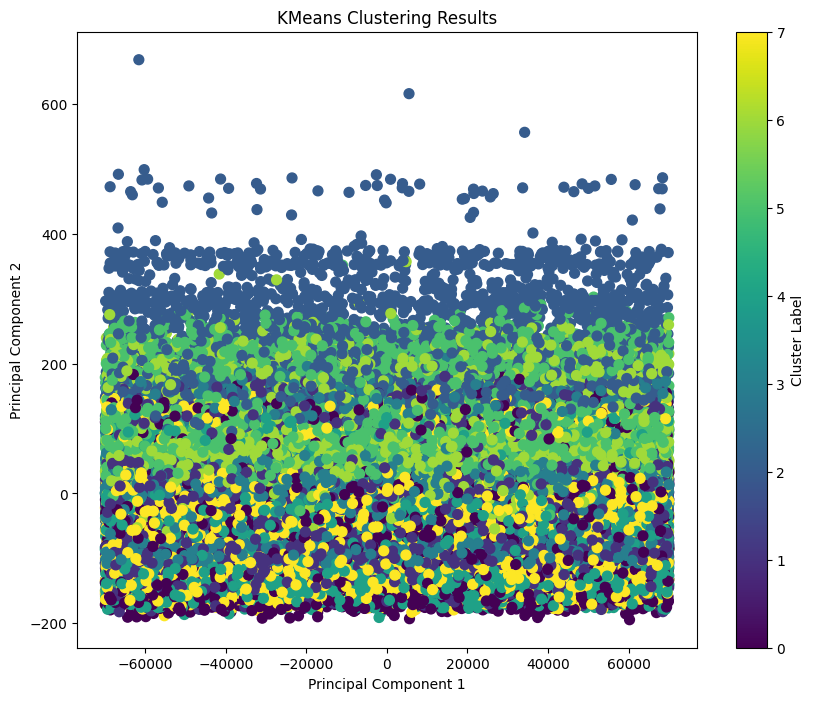

In [229]:
pca = PCA(n_components=2)
X_reduced = pca.fit_transform(train_data_first_ten)

plt.figure(figsize=(10, 8))
plt.scatter(X_reduced[:, 0], X_reduced[:, 1], c=labels, cmap='viridis', s=50)
plt.colorbar(label='Cluster Label')
plt.title('KMeans Clustering Results')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.show()

In [230]:
# pre feature engineer
train_data_first_ten.head()

,id,nominal_power,location_id,soc_0,soc_1,soc_2,soc_3,soc_4,soc_5,soc_6,soc_7,soc_8,soc_9,power_0,power_1,power_2,power_3,power_4,power_5,power_6,power_7,power_8,power_9,cluster
46222,64754,100.0,150,53.0,54.0,54.0,55.0,56.0,56.0,58.0,59.0,59.0,60.0,15.04,14.76,15.01,15.06,15.03,15.04,15.42,15.33,15.40,15.33,7
27040,37916,150.0,101,10.0,13.0,15.0,18.0,20.0,23.0,25.0,28.0,30.0,33.0,66.27,60.10,64.59,64.91,68.69,60.86,62.18,62.24,66.42,66.54,5
87804,123346,150.0,16,25.0,26.0,28.0,29.0,31.0,33.0,34.0,35.0,37.0,39.0,75.55,82.85,86.96,90.10,89.40,82.22,79.15,73.46,84.85,95.53,5
86447,121473,180.0,45,35.0,36.0,37.0,38.0,39.0,40.0,41.0,42.0,43.0,44.0,0.00,41.06,42.00,42.48,42.60,42.96,42.96,43.44,44.16,44.29,3
29515,41368,62.5,64,38.0,40.0,42.0,45.0,47.0,49.0,51.0,53.0,55.0,57.0,45.34,45.92,46.16,46.53,46.89,45.95,41.79,39.13,36.51,35.02,7


In [231]:
# add month back
train_data_first_ten['month'] = train_data_month_first_ten
train_data['month'] = train_data_month

validation_data_first_ten['month'] = validation_data_month_first_ten
validation_data['month'] = validation_data_month

test_data_first_ten['month'] = test_data_month_first_ten
test_data['month'] = test_data_month

In [232]:
# Check the unique labels
unique_labels = set(labels.tolist() + validation_clusters.tolist() + test_clusters.tolist())
print("Unique cluster labels:", unique_labels)

encoder = OneHotEncoder(drop=None, sparse_output=False)
encoder.fit(train_data[['cluster']])

def one_hot_encode_and_concat(df, encoder, column_name='cluster'):
    one_hot_encoded_array = encoder.transform(df[[column_name]])

    one_hot_encoded_df = pd.DataFrame(one_hot_encoded_array,
                                      columns=[f'{column_name}_{int(cat)}' for cat in encoder.categories_[0]],
                                      index=df.index)

    df_with_one_hot = pd.concat([df, one_hot_encoded_df], axis=1)

    return df_with_one_hot


# Apply the helper function to all datasets
train_data_first_ten = one_hot_encode_and_concat(train_data_first_ten, encoder)
train_data = one_hot_encode_and_concat(train_data, encoder)

validation_data_first_ten = one_hot_encode_and_concat(validation_data_first_ten, encoder)
validation_data = one_hot_encode_and_concat(validation_data, encoder)

test_data_first_ten = one_hot_encode_and_concat(test_data_first_ten, encoder)
test_data = one_hot_encode_and_concat(test_data, encoder)

Unique cluster labels: {0, 1, 2, 3, 4, 5, 6, 7}


In [233]:
def add_temp_col(df):
  df = df.copy()
  temperature_data = {
      'month': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12],
      'temperatur': [-4, -4, 0, 5, 10, 14, 17, 15, 11, 5, 1, -3]
  }
  temp_df = pd.DataFrame(temperature_data)
  df = df.merge(temp_df, on='month', how='left')
  df = df.drop(columns=['month'])
  return df


train_data_first_ten = add_temp_col(train_data_first_ten)
train_data = add_temp_col(train_data)

validation_data_first_ten = add_temp_col(validation_data_first_ten)
validation_data = add_temp_col(validation_data)

test_data_first_ten = add_temp_col(test_data_first_ten)
test_data = add_temp_col(test_data)

In [234]:
train_data

,id,nominal_power,location_id,soc_0,soc_1,soc_2,soc_3,soc_4,soc_5,soc_6,soc_7,soc_8,soc_9,soc_10,soc_11,soc_12,soc_13,soc_14,soc_15,soc_16,soc_17,soc_18,soc_19,soc_20,soc_21,soc_22,soc_23,soc_24,soc_25,soc_26,soc_27,soc_28,soc_29,soc_30,soc_31,soc_32,soc_33,soc_34,soc_35,soc_36,soc_37,soc_38,soc_39,power_0,power_1,power_2,power_3,power_4,power_5,power_6,power_7,power_8,power_9,power_10,power_11,power_12,power_13,power_14,power_15,power_16,power_17,power_18,power_19,power_20,power_21,power_22,power_23,power_24,power_25,power_26,power_27,power_28,power_29,power_30,power_31,power_32,power_33,power_34,power_35,power_36,power_37,power_38,power_39,cluster,cluster_0,cluster_1,cluster_2,cluster_3,cluster_4,cluster_5,cluster_6,cluster_7,temperatur
0,64754,100.0,150,53.0,54.0,54.0,55.0,56.0,56.0,58.0,59.0,59.0,60.0,61.0,62.0,63.0,63.0,64.0,65.0,66.0,67.0,68.0,68.0,69.0,70.0,71.0,71.0,73.0,73.0,74.0,75.0,76.0,77.0,78.0,78.0,79.0,86.0,86.0,86.0,88.0,89.0,89.0,90.0,15.04,14.76,15.01,15.06,15.03,15.04,15.42,15.33,15.40,15.33,15.50,15.42,15.45,15.47,15.88,15.95,15.90,15.89,15.84,16.04,16.07,15.77,15.75,15.81,15.80,16.18,16.14,16.27,16.26,16.25,16.71,16.74,16.70,14.35,13.68,13.66,13.28,13.00,12.22,11.86,7,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,-4
1,37916,150.0,101,10.0,13.0,15.0,18.0,20.0,23.0,25.0,28.0,30.0,33.0,35.0,37.0,40.0,42.0,44.0,46.0,48.0,50.0,52.0,54.0,55.0,56.0,59.0,61.0,63.0,65.0,66.0,68.0,70.0,71.0,73.0,74.0,76.0,77.0,79.0,80.0,81.0,83.0,84.0,85.0,66.27,60.10,64.59,64.91,68.69,60.86,62.18,62.24,66.42,66.54,60.68,64.54,51.55,51.71,51.80,51.98,55.72,55.91,56.09,51.36,51.34,51.46,51.73,51.97,54.75,46.56,46.70,46.91,46.99,47.14,41.35,41.63,41.59,39.82,40.06,38.26,38.39,38.46,38.11,18.38,5,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1
2,123346,150.0,16,25.0,26.0,28.0,29.0,31.0,33.0,34.0,35.0,37.0,39.0,40.0,43.0,45.0,48.0,50.0,54.0,56.0,56.0,59.0,61.0,63.0,65.0,67.0,69.0,71.0,73.0,75.0,76.0,78.0,80.0,81.0,82.0,85.0,86.0,88.0,89.0,91.0,92.0,93.0,93.0,75.55,82.85,86.96,90.10,89.40,82.22,79.15,73.46,84.85,95.53,99.33,110.17,127.76,148.57,148.80,98.62,98.47,99.43,101.89,102.31,102.78,103.39,103.73,104.21,104.73,105.15,105.84,106.29,106.67,97.37,94.38,89.94,85.20,83.44,79.82,75.81,73.80,60.20,52.74,43.01,5,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,-4
3,121473,180.0,45,35.0,36.0,37.0,38.0,39.0,40.0,41.0,42.0,43.0,44.0,45.0,47.0,48.0,49.0,50.0,51.0,52.0,53.0,54.0,55.0,56.0,57.0,58.0,59.0,61.0,62.0,63.0,64.0,65.0,67.0,68.0,69.0,70.0,71.0,72.0,73.0,74.0,76.0,77.0,77.0,0.00,41.06,42.00,42.48,42.60,42.96,42.96,43.44,44.16,44.29,44.29,44.29,44.04,44.41,44.17,44.53,44.29,45.14,45.63,46.13,46.99,48.23,48.36,47.00,47.50,48.13,48.63,49.52,49.27,49.15,48.51,47.88,47.23,46.20,45.16,44.12,43.46,42.01,40.07,38.22,3,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0
4,41368,62.5,64,38.0,40.0,42.0,45.0,47.0,49.0,51.0,53.0,55.0,57.0,60.0,60.0,62.0,63.0,65.0,66.0,67.0,69.0,70.0,71.0,72.0,74.0,75.0,76.0,77.0,78.0,80.0,80.0,81.0,82.0,83.0,83.0,84.0,85.0,86.0,86.0,87.0,87.0,88.0,88.0,45.34,45.92,46.16,46.53,46.89,45.95,41.79,39.13,36.51,35.02,33.92,32.86,31.36,30.25,29.14,28.01,26.50,26.14,25.80,25.16,24.49,24.12,23.42,22.64,22.28,21.10,20.82,20.50,19.70,18.98,18.57,18.24,16.99,15.84,15.06,13.83,13.20,12.29,11.57,10.74,7,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,11
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
78180,8919,200.0,254,44.0,44.0,45.0,46.0,48.0,49.0,50.0,50.0,52.0,54.0,55.0,56.0,56.0,58.0,59.0,60.0,62.0,63.0,64.0,65.0,66.0,67.0,68.0,69.0,70.0,71.0,71.0,73.0,74.0,75.0,76.0,77.0,78.0,79.0,80.0,81.0,81.0,81.0,82.0,84.0,46.98,47.51,47.97,48.44,48.88,49.37,49.73,50.10,50.02,49.57,49.03,48.51,48.21,47.96,47.50,47.28,46.78,46.26,45.77,45.99,46.29,46.63,46.97,47.35,46.88,45.47,44.10,42.67,4

In [235]:
def plot_mean():
    # Calculate the average SOC and Power for each cluster by taking the mean across all time steps
    cluster_avg_soc = train_data_first_ten.groupby('cluster')[SOC_COLOUMNS_SUBSET].mean().mean(axis=1)
    cluster_avg_power = train_data_first_ten.groupby('cluster')[POWER_COLOUMNS_SUBSET].mean().mean(axis=1)

    # Create a figure with two subplots: one for SOC and one for Power
    fig, axes = plt.subplots(1, 2, figsize=(15, 6))

    # Bar chart for average SOC
    axes[0].bar(cluster_avg_soc.index, cluster_avg_soc.values, color='b')
    axes[0].set_title('Average SOC per Cluster')
    axes[0].set_xlabel('Cluster')
    axes[0].set_ylabel('Average SOC')
    axes[0].grid(True)

    # Bar chart for average Power
    axes[1].bar(cluster_avg_power.index, cluster_avg_power.values, color='r')
    axes[1].set_title('Average Power per Cluster')
    axes[1].set_xlabel('Cluster')
    axes[1].set_ylabel('Average Power')
    axes[1].grid(True)

    # Show the plots
    plt.tight_layout()
    plt.show()


In [236]:
def plot_variation():
    # Combine SOC and Power columns for plotting the boxplots
    # First, we will stack the SOC columns and Power columns for each cluster

    # Create a new DataFrame to hold SOC and Power values by cluster
    soc_data = train_data_first_ten.melt(id_vars=['cluster'], value_vars=SOC_COLOUMNS_SUBSET, var_name='SOC_Timestep', value_name='SOC')
    power_data = train_data_first_ten.melt(id_vars=['cluster'], value_vars=POWER_COLOUMNS_SUBSET, var_name='Power_Timestep', value_name='Power')

    # Set up a figure for the boxplot
    plt.figure(figsize=(18, 8))

    # Plot the SOC variation
    plt.subplot(1, 2, 1)
    sns.boxplot(x='cluster', y='SOC', data=soc_data, palette='Blues')
    plt.title('SOC Variation by Cluster')
    plt.xlabel('Cluster')
    plt.ylabel('SOC')

    # Plot the Power variation
    plt.subplot(1, 2, 2)
    sns.boxplot(x='cluster', y='Power', data=power_data, palette='Reds')
    plt.title('Power Variation by Cluster')
    plt.xlabel('Cluster')
    plt.ylabel('Power')

    # Show the plots
    plt.tight_layout()
    plt.show()

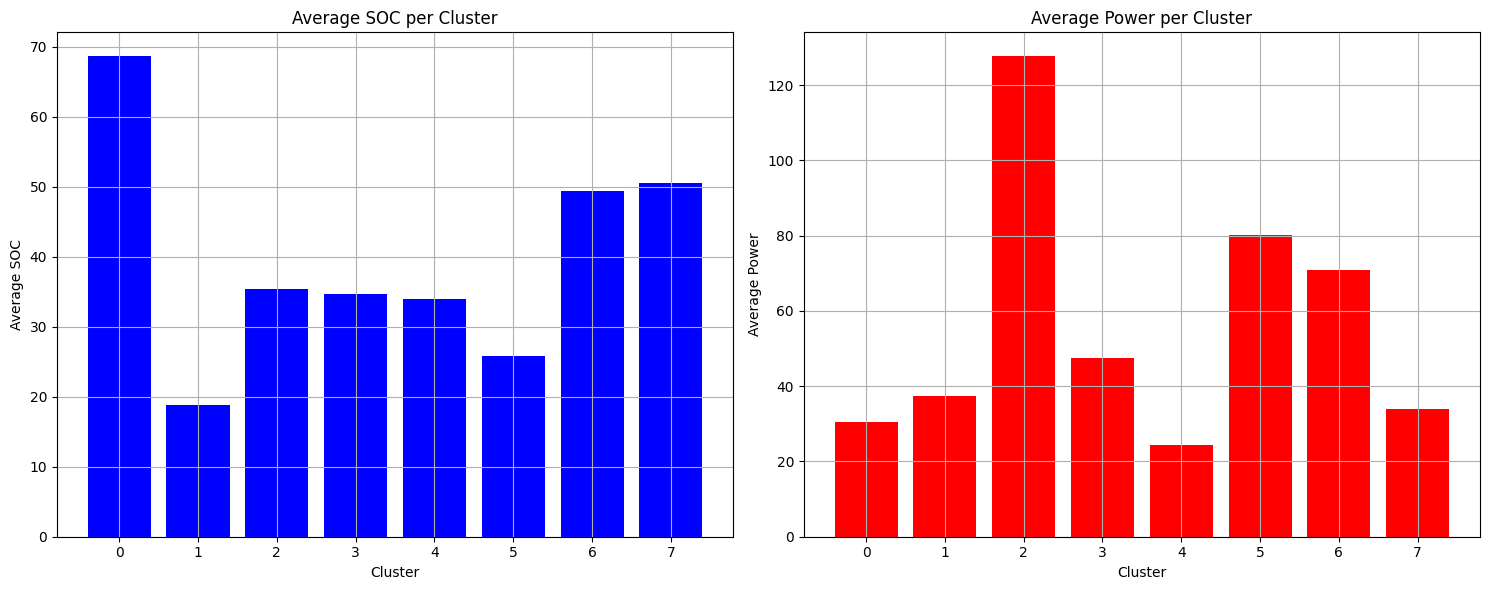

/tmp/ipykernel_109994/3570555530.py:14: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='cluster', y='SOC', data=soc_data, palette='Blues')
/tmp/ipykernel_109994/3570555530.py:21: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='cluster', y='Power', data=power_data, palette='Reds')


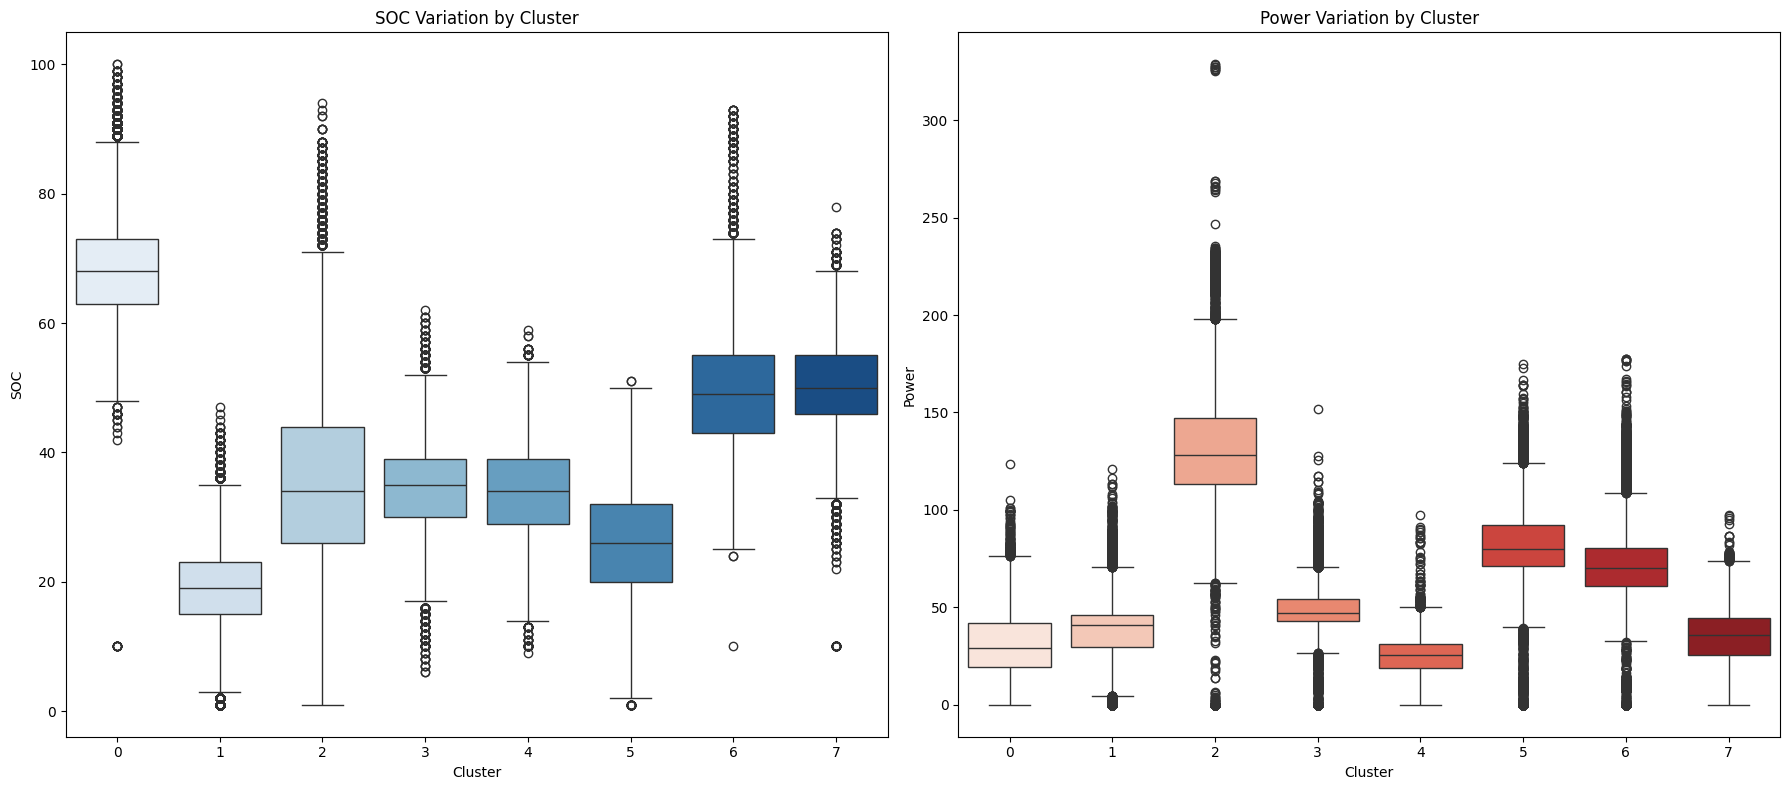

In [237]:
plot_mean()
plot_variation()

In [238]:
def get_model_pipeline():
    return Pipeline([
        ('scaler', MinMaxScaler()),
        ('poly', PolynomialFeatures(degree=2)),
        # ('pca', PCA(n_components=0.50)),
        ('regressor', MultiOutputRegressor(Ridge(random_state=RANDOM_STATE))),
    ])

In [239]:
TARGET_POWER = [f'power_{i}' for i in range(10, 40)]
TARGET_SOC = [f'soc_{i}' for i in range(10, 40)]

REMOVE = ["cluster","month","timestamp"]
TO_DROP_FROM_X = TARGET_POWER + TARGET_SOC + REMOVE

all_columns = train_data.columns.tolist()

# Define input features by excluding the target columns
INPUT_FEATURES_MODEL = [col for col in all_columns if col not in TO_DROP_FROM_X ]


In [240]:
train_data[INPUT_FEATURES_MODEL]

,id,nominal_power,location_id,soc_0,soc_1,soc_2,soc_3,soc_4,soc_5,soc_6,soc_7,soc_8,soc_9,power_0,power_1,power_2,power_3,power_4,power_5,power_6,power_7,power_8,power_9,cluster_0,cluster_1,cluster_2,cluster_3,cluster_4,cluster_5,cluster_6,cluster_7,temperatur
0,64754,100.0,150,53.0,54.0,54.0,55.0,56.0,56.0,58.0,59.0,59.0,60.0,15.04,14.76,15.01,15.06,15.03,15.04,15.42,15.33,15.40,15.33,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,-4
1,37916,150.0,101,10.0,13.0,15.0,18.0,20.0,23.0,25.0,28.0,30.0,33.0,66.27,60.10,64.59,64.91,68.69,60.86,62.18,62.24,66.42,66.54,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1
2,123346,150.0,16,25.0,26.0,28.0,29.0,31.0,33.0,34.0,35.0,37.0,39.0,75.55,82.85,86.96,90.10,89.40,82.22,79.15,73.46,84.85,95.53,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,-4
3,121473,180.0,45,35.0,36.0,37.0,38.0,39.0,40.0,41.0,42.0,43.0,44.0,0.00,41.06,42.00,42.48,42.60,42.96,42.96,43.44,44.16,44.29,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0
4,41368,62.5,64,38.0,40.0,42.0,45.0,47.0,49.0,51.0,53.0,55.0,57.0,45.34,45.92,46.16,46.53,46.89,45.95,41.79,39.13,36.51,35.02,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,11
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
78180,8919,200.0,254,44.0,44.0,45.0,46.0,48.0,49.0,50.0,50.0,52.0,54.0,46.98,47.51,47.97,48.44,48.88,49.37,49.73,50.10,50.02,49.57,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,5
78181,78406,360.0,75,68.0,68.0,69.0,69.0,70.0,71.0,72.0,72.0,73.0,73.0,0.00,29.80,34.09,29.18,29.26,29.26,28.56,27.79,27.86,27.86,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,11
78182,109876,50.0,138,62.0,63.0,63.0,64.0,65.0,65.0,66.0,66.0,67.0,68.0,0.00,37.32,36.67,35.91,35.25,35.25,36.01,38.00,40.01,41.64,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,-3
78183,1239,200.0,56,19.0,19.0,20.0,20.0,21.0,21.0,22.0,23.0,23.0,24.0,27.27,26.69,26.78,26.75,26.85,27.61,27.94,28.34,31.20,33.34,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,-3


In [241]:
models_power = {}
for label in range(0, n_clusters_):
    one_hot_column_name = f'cluster_{label}'

    train_subset = train_data[train_data[one_hot_column_name] == 1]

    X_train_lin = train_subset[INPUT_FEATURES_MODEL]
    y_train_lin_power = train_subset[TARGET_POWER]

    pipeline_model = get_model_pipeline()
    pipeline_model.fit(X_train_lin, y_train_lin_power)

    models_power[label] = pipeline_model
    print(f"Trained model for cluster {label} on {len(train_subset)} samples.")


Trained model for cluster 0 on 7802 samples.
Trained model for cluster 1 on 12877 samples.
Trained model for cluster 2 on 3446 samples.
Trained model for cluster 3 on 13723 samples.
Trained model for cluster 4 on 8937 samples.
Trained model for cluster 5 on 10004 samples.


KeyboardInterrupt: 

In [ ]:
validation_scores_power = {}
for cluster, model in models_power.items():
    one_hot_column_name = f'cluster_{label}'
    val_subset = validation_data[validation_data[one_hot_column_name] == 1]

    X_val = val_subset[INPUT_FEATURES_MODEL]
    y_val = val_subset[TARGET_POWER]
    y_pred = model.predict(X_val)

    mae = mean_absolute_error(y_val, y_pred)

    validation_scores_power[cluster] = mae

    print(f"Cluster {cluster}: MAE = {mae:.3f}")

Cluster 0: MAE = 8.351
Cluster 1: MAE = 5.759
Cluster 2: MAE = 6.902
Cluster 3: MAE = 5.996
Cluster 4: MAE = 21.520
Cluster 5: MAE = 9.939
Cluster 6: MAE = 4.260


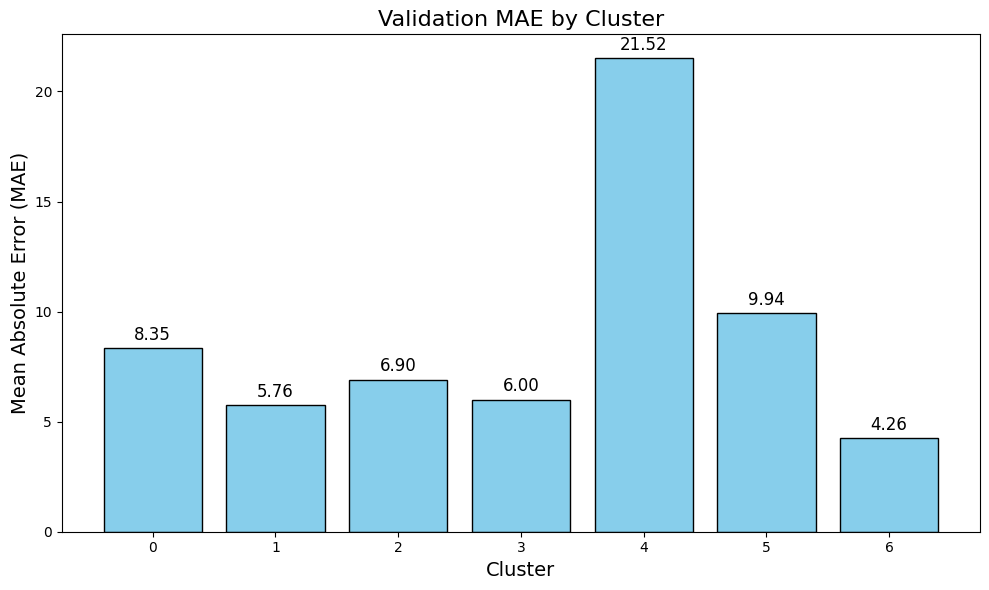

In [ ]:
clusters = list(validation_scores_power.keys())
mae_values = list(validation_scores_power.values())

plt.figure(figsize=(10, 6))
plt.bar(clusters, mae_values, color='skyblue', edgecolor='black')
plt.xlabel("Cluster", fontsize=14)
plt.ylabel("Mean Absolute Error (MAE)", fontsize=14)
plt.title("Validation MAE by Cluster", fontsize=16)
plt.xticks(clusters)

for idx, mae in zip(clusters, mae_values):
    plt.text(idx, mae + 0.2, f"{mae:.2f}", ha="center", va="bottom", fontsize=12)
plt.tight_layout()
plt.show()


In [ ]:
total_instances = len(validation_data)
weighted_sum = 0

for cluster, mae in validation_scores_power.items():
    one_hot_column_name = f'cluster_{cluster}'
    count = len(validation_data[validation_data[one_hot_column_name] == 1])
    weighted_sum += mae * count
    print(f"Cluster {cluster}: instances = {count}, MAE = {mae:.3f}")

weighted_avg_mae = weighted_sum / total_instances
print(f"\nTotal instances in validation data: {total_instances}")
print(f"Weighted Average MAE POWER: {weighted_avg_mae:.3f}")

Cluster 0: instances = 843, MAE = 8.351
Cluster 1: instances = 1822, MAE = 5.759
Cluster 2: instances = 3663, MAE = 6.902
Cluster 3: instances = 3750, MAE = 5.996
Cluster 4: instances = 669, MAE = 21.520
Cluster 5: instances = 1703, MAE = 9.939
Cluster 6: instances = 2210, MAE = 4.260

Total instances in validation data: 14660
Weighted Average MAE POWER: 7.233


In [126]:
# SOC IS NEXT
TARGET_SOC = [f'soc_{i}' for i in range(10, 40)]

In [ ]:
models_soc = {}
for label in range(0, n_clusters_):
    one_hot_column_name = f'cluster_{label}'
    train_subset = train_data[train_data[one_hot_column_name] == 1]

    X_train_lin = train_subset[INPUT_FEATURES_MODEL]
    y_train_lin_power = train_subset[TARGET_SOC]

    pipeline_model = get_model_pipeline()
    pipeline_model.fit(X_train_lin, y_train_lin_power)

    models_soc[label] = pipeline_model
    print(f"Trained model for cluster {label} on {len(train_subset)} samples.")


Trained model for cluster 0 on 3883 samples.
Trained model for cluster 1 on 8402 samples.
Trained model for cluster 2 on 16523 samples.
Trained model for cluster 3 on 17977 samples.
Trained model for cluster 4 on 3289 samples.
Trained model for cluster 5 on 7948 samples.
Trained model for cluster 6 on 10390 samples.


In [ ]:
validation_scores_soc = {}
for cluster, model in models_soc.items():
    one_hot_column_name = f'cluster_{label}'
    val_subset = validation_data[validation_data[one_hot_column_name] == 1]

    X_val = val_subset[INPUT_FEATURES_MODEL]
    y_val = val_subset[TARGET_SOC]

    y_pred = model.predict(X_val)
    mae = mean_absolute_error(y_val, y_pred)

    validation_scores_soc[cluster] = mae

    print(f"Cluster {cluster}: MAE = {mae:.3f}")

Cluster 0: MAE = 2.523
Cluster 1: MAE = 1.789
Cluster 2: MAE = 4.326
Cluster 3: MAE = 1.710
Cluster 4: MAE = 6.994
Cluster 5: MAE = 2.920
Cluster 6: MAE = 1.396


In [ ]:
for cluster, model in models_soc.items():
    one_hot_column_name = f'cluster_{label}'
    val_subset = validation_data[validation_data[one_hot_column_name] == 1]
    
    X_val = val_subset[INPUT_FEATURES_MODEL]
    y_val = val_subset[TARGET_SOC]

    y_pred = model.predict(X_val)
    mae = mean_absolute_error(y_val, y_pred)

    validation_scores_soc[cluster] = mae

    print(f"Cluster {cluster}: MAE = {mae:.3f}")

Cluster 0: MAE = 2.523
Cluster 1: MAE = 1.789
Cluster 2: MAE = 4.326
Cluster 3: MAE = 1.710
Cluster 4: MAE = 6.994
Cluster 5: MAE = 2.920
Cluster 6: MAE = 1.396


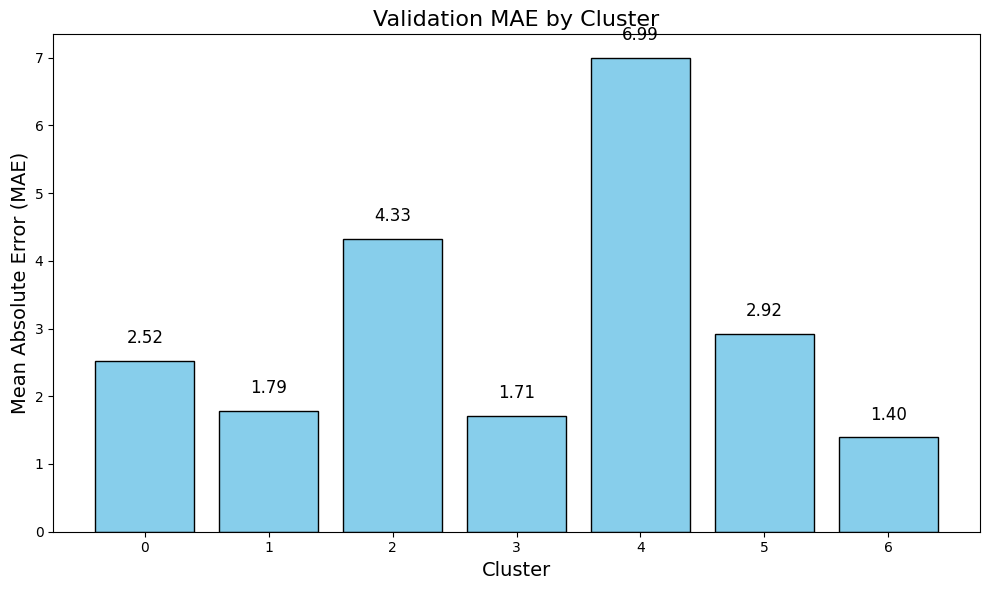

In [ ]:
clusters = list(validation_scores_soc.keys())
mae_values = list(validation_scores_soc.values())

plt.figure(figsize=(10, 6))
plt.bar(clusters, mae_values, color='skyblue', edgecolor='black')
plt.xlabel("Cluster", fontsize=14)
plt.ylabel("Mean Absolute Error (MAE)", fontsize=14)
plt.title("Validation MAE by Cluster", fontsize=16)
plt.xticks(clusters)

for idx, mae in zip(clusters, mae_values):
    plt.text(idx, mae + 0.2, f"{mae:.2f}", ha="center", va="bottom", fontsize=12)
plt.tight_layout()
plt.show()


In [131]:
total_instances = len(validation_data)
weighted_sum = 0

for cluster, mae in validation_scores_soc.items():
    one_hot_column_name = f'cluster_{cluster}'
    count = len(validation_data[validation_data[one_hot_column_name] == 1])
    weighted_sum += mae * count
    print(f"Cluster {cluster}: instances = {count}, MAE = {mae:.3f}")

weighted_avg_mae = weighted_sum / total_instances
print(f"\nTotal instances in validation data: {total_instances}")
print(f"Weighted Average MAE SOC: {weighted_avg_mae:.3f}")

Cluster 0: instances = 843, MAE = 2.523
Cluster 1: instances = 1822, MAE = 1.789
Cluster 2: instances = 3663, MAE = 4.326
Cluster 3: instances = 3750, MAE = 1.710
Cluster 4: instances = 669, MAE = 6.994
Cluster 5: instances = 1703, MAE = 2.920
Cluster 6: instances = 2210, MAE = 1.396

Total instances in validation data: 14660
Weighted Average MAE SOC: 2.754
